In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/cervical_cancer.csv')
print(df)

      1 Number of sexual partners First sexual intercourse Num of pregnancies  \
0    18                         4                       15                  1   
1    15                         1                       14                  1   
2    34                         1                        ?                  1   
3    52                         5                       16                  4   
4    46                         3                       21                  4   
..   ..                       ...                      ...                ...   
853  34                         3                       18                  0   
854  32                         2                       19                  1   
855  25                         2                       17                  0   
856  33                         2                       24                  2   
857  29                         2                       20                  1   

    Smokes Smokes (years) S

In [3]:
df.head(10)

,1,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
5,42,3,23,2,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,1
6,51,3,17,6,1,34,3.4,0,0,1,...,?,?,0,0,0,0,1,1,0,0
7,26,1,26,3,0,0,0,1,2,1,...,?,?,0,0,0,0,0,0,0,0
8,45,1,20,5,0,0,0,0,0,0,...,?,?,1,0,1,1,0,0,0,0
9,44,3,15,?,1,1.266972909,2.8,0,0,?,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['1', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [5]:
df.columns=['Age', 'No_of_sex_partner', 'First_sexual_intercourse',\
                          'No_pregnancies','Smokes',  'Smokes_yrs',  'Smokes_packs_yr',  'Hormonal_Contraceptives',\
                          'Hormonal_Contraceptives_years','IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis',\
                          'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis',\
                          'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum',\
                          'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'STD_Time_since_first_diagnosis',\
                          'STDs_Time_since_last_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann','Schiller' ,'Citology', 'Biopsy']

In [6]:
df.shape

(858, 36)

In [7]:
#df.isnull().sum()

In [8]:
#df.isnull().sum().max()

# Missing Value Check

In [9]:
df = df.replace('?', np.NaN)
df.head(10)

,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,IUD,...,STD_Time_since_first_diagnosis,STDs_Time_since_last_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3,23,2,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,1
6,51,3,17,6,1,34,3.4,0,0,1,...,NaN,NaN,0,0,0,0,1,1,0,0
7,26,1,26,3,0,0,0,1,2,1,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1,20,5,0,0,0,0,0,0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3,15,NaN,1,1.266972909,2.8,0,0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


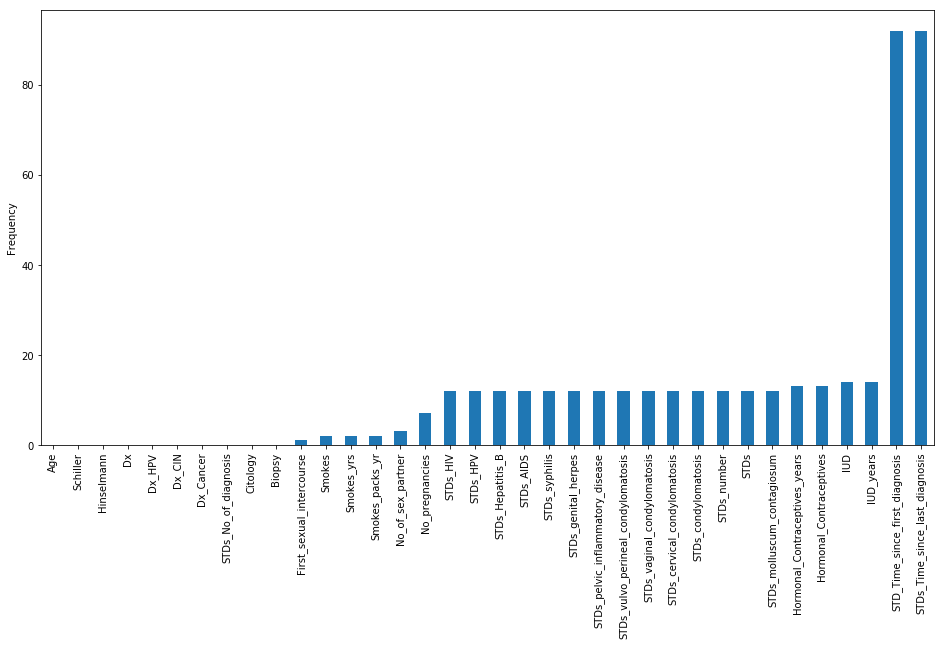

In [10]:
plt.figure(figsize=(16,8))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='bar')
plt.ylabel("Frequency");

In [11]:
#Drop 2 columns due to NaN value
df=df.drop(['STD_Time_since_first_diagnosis','STDs_Time_since_last_diagnosis'],axis=1)
df=df.drop(df.index[df.Smokes.isnull()] | df.index[df.First_sexual_intercourse.isnull()])

In [12]:
x_features=list(df.columns)
x_features.remove('Biopsy')

In [13]:
x_features_categorical=[
 'Smokes','Hormonal_Contraceptives','IUD','STDs','STDs_condylomatosis','STDs_cervical_condylomatosis','STDs_vaginal_condylomatosis','STDs_vulvo_perineal_condylomatosis','STDs_syphilis','STDs_pelvic_inflammatory_disease','STDs_genital_herpes','STDs_molluscum_contagiosum','STDs_AIDS','STDs_HIV','STDs_Hepatitis_B','STDs_HPV','Dx_Cancer','Dx_CIN','Dx_HPV','Dx']
x_features_categorical


['Smokes',
 'Hormonal_Contraceptives',
 'IUD',
 'STDs',
 'STDs_condylomatosis',
 'STDs_cervical_condylomatosis',
 'STDs_vaginal_condylomatosis',
 'STDs_vulvo_perineal_condylomatosis',
 'STDs_syphilis',
 'STDs_pelvic_inflammatory_disease',
 'STDs_genital_herpes',
 'STDs_molluscum_contagiosum',
 'STDs_AIDS',
 'STDs_HIV',
 'STDs_Hepatitis_B',
 'STDs_HPV',
 'Dx_Cancer',
 'Dx_CIN',
 'Dx_HPV',
 'Dx']

In [14]:
x_features_numerical=[i for i in x_features if i not in x_features_categorical]
x_features_numerical

['Age',
 'No_of_sex_partner',
 'First_sexual_intercourse',
 'No_pregnancies',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'Hormonal_Contraceptives_years',
 'IUD_years',
 'STDs_number',
 'STDs_No_of_diagnosis',
 'Hinselmann',
 'Schiller',
 'Citology']

In [15]:
df.head(10)

,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,IUD,...,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0
5,42,3,23,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,51,3,17,6,1,34,3.4,0,0,1,...,0,0,0,0,0,0,1,1,0,0
7,26,1,26,3,0,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
8,45,1,20,5,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
9,44,3,15,NaN,1,1.266972909,2.8,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
10,44,3,26,4,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 

# Missing Value Imputation

In [17]:
df_iud=df.copy()

x_features_categorical.remove('IUD')
for i in x_features_categorical:
    df_iud[i]=df_iud[i].fillna(df_iud[i].mode()[0])
for i in x_features_numerical:
    df_iud[i]=df_iud[i].fillna(df_iud[i].median())
    
df_iud=df_iud.astype('float')
df_iud[x_features_categorical]=df_iud[x_features_categorical].replace(0,'no')
df_iud[x_features_categorical]=df_iud[x_features_categorical].replace(1,'yes')
df_iud=pd.get_dummies(df_iud)

train_iud=df_iud[df_iud.IUD.isnull()==False]
test_iud=df_iud[df_iud.IUD.isnull()]

train_iud_x=train_iud.drop('IUD',axis=1)
train_iud_y=train_iud['IUD']

test_iud_x=test_iud.drop('IUD',axis=1)
test_iud_y=test_iud['IUD']

dt=DecisionTreeClassifier()
iud_model=dt.fit(train_iud_x,train_iud_y)
test_iud['IUD']=iud_model.predict(test_iud_x)

iud_complete=pd.concat([train_iud,test_iud],axis=0)

df_impute=df.copy()
df_impute['IUD']=iud_complete['IUD'].sort_index()

In [18]:
x_features_numerical.remove('IUD_years')
df_impute['IUD_years']=df_impute['IUD_years'].fillna(0)

In [19]:
df_hor=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('Hormonal_Contraceptives')
for i in x_features_categorical:
    df_hor[i]=df_hor[i].fillna(df_hor[i].mode()[0])
for i in x_features_numerical:
    df_hor[i]=df_hor[i].fillna(df_hor[i].median())
    
df_hor=df_hor.astype('float')
df_hor[x_features_categorical]=df_hor[x_features_categorical].replace(0,'no')
df_hor[x_features_categorical]=df_hor[x_features_categorical].replace(1,'yes')
df_hor=pd.get_dummies(df_hor)

train_hor=df_hor[df_hor.Hormonal_Contraceptives.isnull()==False]
test_hor=df_hor[df_hor.Hormonal_Contraceptives.isnull()]

train_hor_x=train_hor.drop('Hormonal_Contraceptives',axis=1)
train_hor_y=train_hor['Hormonal_Contraceptives']

test_hor_x=test_hor.drop('Hormonal_Contraceptives',axis=1)
test_hor_y=test_hor['Hormonal_Contraceptives']


dt=DecisionTreeClassifier()
hor_model=dt.fit(train_hor_x,train_hor_y)
test_hor['Hormonal_Contraceptives']=hor_model.predict(test_hor_x)

hor_complete=pd.concat([train_hor,test_hor],axis=0)

df_impute['Hormonal_Contraceptives']=hor_complete['Hormonal_Contraceptives'].sort_index()

In [20]:
df_hor_y=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('Hormonal_Contraceptives_years')
for i in x_features_categorical:
    df_hor_y[i]=df_hor_y[i].fillna(df_hor_y[i].mode()[0])

for i in x_features_numerical:
    df_hor_y[i]=df_hor_y[i].fillna(df_hor_y[i].median())

df_hor_y=df_hor_y.astype('float')
df_hor_y[x_features_categorical]=df_hor_y[x_features_categorical].replace(0,'no')
df_hor_y[x_features_categorical]=df_hor_y[x_features_categorical].replace(1,'yes')
df_hor_y=pd.get_dummies(df_hor_y)

train_hor_yrs=df_hor_y[df_hor_y.Hormonal_Contraceptives_years.isnull()==False]
test_hor_yrs=df_hor_y[df_hor_y.Hormonal_Contraceptives_years.isnull()]

train_hor_yrs_x=train_hor_yrs.drop('Hormonal_Contraceptives_years',axis=1)
train_hor_yrs_y=train_hor_yrs['Hormonal_Contraceptives_years']

test_hor_yrs_x=test_hor_yrs.drop('Hormonal_Contraceptives_years',axis=1)
test_hor_yrs_y=test_hor_yrs['Hormonal_Contraceptives_years']

dt=DecisionTreeRegressor()
hor_yrs_model=dt.fit(train_hor_yrs_x,train_hor_yrs_y)
test_hor_yrs['Hormonal_Contraceptives_years']=hor_yrs_model.predict(test_hor_yrs_x)

hor_yrs_complete=pd.concat([train_hor_yrs,test_hor_yrs],axis=0)

df_impute['Hormonal_Contraceptives_years']=hor_yrs_complete['Hormonal_Contraceptives_years'].sort_index()

In [21]:
df_std=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs')
for i in x_features_categorical:
    df_std[i]=df_std[i].fillna(df_std[i].mode()[0])
for i in x_features_numerical:
    df_std[i]=df_std[i].fillna(df_std[i].median())
    
df_std=df_std.astype('float')
df_std[x_features_categorical]=df_std[x_features_categorical].replace(0,'no')
df_std[x_features_categorical]=df_std[x_features_categorical].replace(1,'yes')
df_std=pd.get_dummies(df_std)

train_std=df_std[df_std.STDs.isnull()==False]
test_std=df_std[df_std.STDs.isnull()]

train_std_x=train_std.drop('STDs',axis=1)
train_std_y=train_std['STDs']

test_std_x=test_std.drop('STDs',axis=1)
test_std_y=test_std['STDs']

dt=DecisionTreeClassifier()
std_model=dt.fit(train_std_x,train_std_y)
test_std['STDs']=std_model.predict(test_std_x)

std_complete=pd.concat([train_std,test_std],axis=0)

df_impute['STDs']=std_complete['STDs'].sort_index()

In [22]:
df_std_num=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('STDs_number')
for i in x_features_categorical:
    df_std_num[i]=df_std_num[i].fillna(df_std_num[i].mode()[0])
for i in x_features_numerical:
    df_std_num[i]=df_std_num[i].fillna(df_std_num[i].median())

df_std_num=df_std_num.astype('float')
df_std_num[x_features_categorical]=df_std_num[x_features_categorical].replace(0,'no')
df_std_num[x_features_categorical]=df_std_num[x_features_categorical].replace(1,'yes')
df_std_num=pd.get_dummies(df_std_num)

train_std_num=df_std_num[df_std_num.STDs_number.isnull()==False]
test_std_num=df_std_num[df_std_num.STDs_number.isnull()]

train_std_num_x=train_std_num.drop('STDs_number',axis=1)
train_std_num_y=train_std_num['STDs_number']

test_std_num_x=test_std_num.drop('STDs_number',axis=1)
test_std_num_y=test_std_num['STDs_number']

dt=DecisionTreeRegressor()
std_model_num=dt.fit(train_std_num_x,train_std_num_y)
test_std_num['STDs_number']=std_model_num.predict(test_std_num_x)

std_num_complete=pd.concat([train_std_num,test_std_num],axis=0)

df_impute['STDs_number']=std_num_complete['STDs_number'].sort_index()

In [23]:
df_std_con=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_condylomatosis')
for i in x_features_categorical:
    df_std_con[i]=df_std_con[i].fillna(df_std_con[i].mode()[0])
for i in x_features_numerical:
    df_std_con[i]=df_std_con[i].fillna(df_std_con[i].median())

df_std_con=df_std_con.astype('float')
df_std_con[x_features_categorical]=df_std_con[x_features_categorical].replace(0,'no')
df_std_con[x_features_categorical]=df_std_con[x_features_categorical].replace(1,'yes')
df_std_con=pd.get_dummies(df_std_con)

train_std_con=df_std_con[df_std_con.STDs_condylomatosis.isnull()==False]
test_std_con=df_std_con[df_std_con.STDs_condylomatosis.isnull()]

train_std_con_x=train_std_con.drop('STDs_condylomatosis',axis=1)
train_std_con_y=train_std_con['STDs_condylomatosis']

test_std_con_x=test_std_con.drop('STDs_condylomatosis',axis=1)
test_std_con_y=test_std_con['STDs_condylomatosis']

dt=DecisionTreeClassifier()
std_model_con=dt.fit(train_std_con_x,train_std_con_y)
test_std_con['STDs_condylomatosis']=std_model_con.predict(test_std_con_x)

std_con_complete=pd.concat([train_std_con,test_std_con],axis=0)

df_impute['STDs_condylomatosis']=std_con_complete['STDs_condylomatosis'].sort_index()

In [24]:
df_std_cerv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_cervical_condylomatosis')
for i in x_features_categorical:
    df_std_cerv[i]=df_std_cerv[i].fillna(df_std_cerv[i].mode()[0])
for i in x_features_numerical:
    df_std_cerv[i]=df_std_cerv[i].fillna(df_std_cerv[i].median())

df_std_cerv=df_std_cerv.astype('float')
df_std_cerv[x_features_categorical]=df_std_cerv[x_features_categorical].replace(0,'no')
df_std_cerv[x_features_categorical]=df_std_cerv[x_features_categorical].replace(1,'yes')
df_std_cerv=pd.get_dummies(df_std_cerv)

train_std_cerv=df_std_cerv[df_std_cerv.STDs_cervical_condylomatosis.isnull()==False]
test_std_cerv=df_std_cerv[df_std_cerv.STDs_cervical_condylomatosis.isnull()]

train_std_cerv_x=train_std_cerv.drop('STDs_cervical_condylomatosis',axis=1)
train_std_cerv_y=train_std_cerv['STDs_cervical_condylomatosis']

test_std_cerv_x=test_std_cerv.drop('STDs_cervical_condylomatosis',axis=1)
test_std_cerv_y=test_std_cerv['STDs_cervical_condylomatosis']


dt=DecisionTreeClassifier()
std_model_cerv=dt.fit(train_std_cerv_x,train_std_cerv_y)
test_std_cerv['STDs_cervical_condylomatosis']=std_model_cerv.predict(test_std_cerv_x)

std_cerv_complete=pd.concat([train_std_cerv,test_std_cerv],axis=0)

df_impute['STDs_cervical_condylomatosis']=std_cerv_complete['STDs_cervical_condylomatosis'].sort_index()

In [25]:
df_std_vagi=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_vaginal_condylomatosis')
for i in x_features_categorical:
    df_std_vagi[i]=df_std_vagi[i].fillna(df_std_vagi[i].mode()[0])
for i in x_features_numerical:
    df_std_vagi[i]=df_std_vagi[i].fillna(df_std_vagi[i].median())

df_std_vagi=df_std_vagi.astype('float')
df_std_vagi[x_features_categorical]=df_std_vagi[x_features_categorical].replace(0,'no')
df_std_vagi[x_features_categorical]=df_std_vagi[x_features_categorical].replace(1,'yes')
df_std_vagi=pd.get_dummies(df_std_vagi)

train_std_vagi=df_std_vagi[df_std_vagi.STDs_vaginal_condylomatosis.isnull()==False]
test_std_vagi=df_std_vagi[df_std_vagi.STDs_vaginal_condylomatosis.isnull()]

train_std_vagi_x=train_std_vagi.drop('STDs_vaginal_condylomatosis',axis=1)
train_std_vagi_y=train_std_vagi['STDs_vaginal_condylomatosis']

test_std_vagi_x=test_std_vagi.drop('STDs_vaginal_condylomatosis',axis=1)
test_std_vagi_y=test_std_vagi['STDs_vaginal_condylomatosis']


dt=DecisionTreeClassifier()
std_model_vagi=dt.fit(train_std_vagi_x,train_std_vagi_y)
test_std_vagi['STDs_vaginal_condylomatosis']=std_model_vagi.predict(test_std_vagi_x)

std_vagi_complete=pd.concat([train_std_vagi,test_std_vagi],axis=0)

df_impute['STDs_vaginal_condylomatosis']=std_vagi_complete['STDs_vaginal_condylomatosis'].sort_index()

In [26]:
df_std_peri=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_vulvo_perineal_condylomatosis')
for i in x_features_categorical:
    df_std_peri[i]=df_std_peri[i].fillna(df_std_peri[i].mode()[0])
for i in x_features_numerical:
    df_std_peri[i]=df_std_peri[i].fillna(df_std_peri[i].median())

df_std_peri=df_std_peri.astype('float')
df_std_peri[x_features_categorical]=df_std_peri[x_features_categorical].replace(0,'no')
df_std_peri[x_features_categorical]=df_std_peri[x_features_categorical].replace(1,'yes')
df_std_peri=pd.get_dummies(df_std_peri)

train_std_peri=df_std_peri[df_std_peri.STDs_vulvo_perineal_condylomatosis.isnull()==False]
test_std_peri=df_std_peri[df_std_peri.STDs_vulvo_perineal_condylomatosis.isnull()]

train_std_peri_x=train_std_peri.drop('STDs_vulvo_perineal_condylomatosis',axis=1)
train_std_peri_y=train_std_peri['STDs_vulvo_perineal_condylomatosis']

test_std_peri_x=test_std_peri.drop('STDs_vulvo_perineal_condylomatosis',axis=1)
test_std_peri_y=test_std_peri['STDs_vulvo_perineal_condylomatosis']

dt=DecisionTreeClassifier()
std_model_peri=dt.fit(train_std_peri_x,train_std_peri_y)
test_std_peri['STDs_vulvo_perineal_condylomatosis']=std_model_peri.predict(test_std_peri_x)

std_peri_complete=pd.concat([train_std_peri,test_std_peri],axis=0)

df_impute['STDs_vulvo_perineal_condylomatosis']=std_peri_complete['STDs_vulvo_perineal_condylomatosis'].sort_index()

In [27]:
df_std_syp=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_syphilis')
for i in x_features_categorical:
    df_std_syp[i]=df_std_syp[i].fillna(df_std_syp[i].mode()[0])
for i in x_features_numerical:
    df_std_syp[i]=df_std_syp[i].fillna(df_std_syp[i].median())

df_std_syp=df_std_syp.astype('float')
df_std_syp[x_features_categorical]=df_std_syp[x_features_categorical].replace(0,'no')
df_std_syp[x_features_categorical]=df_std_syp[x_features_categorical].replace(1,'yes')
df_std_syp=pd.get_dummies(df_std_syp)

train_std_syp=df_std_syp[df_std_syp.STDs_syphilis.isnull()==False]
test_std_syp=df_std_syp[df_std_syp.STDs_syphilis.isnull()]

train_std_syp_x=train_std_syp.drop('STDs_syphilis',axis=1)
train_std_syp_y=train_std_syp['STDs_syphilis']

test_std_syp_x=test_std_syp.drop('STDs_syphilis',axis=1)
test_std_syp_y=test_std_syp['STDs_syphilis']

dt=DecisionTreeClassifier()
std_model_syp=dt.fit(train_std_syp_x,train_std_syp_y)
test_std_syp['STDs_syphilis']=std_model_syp.predict(test_std_syp_x)

std_syp_complete=pd.concat([train_std_syp,test_std_syp],axis=0)

df_impute['STDs_syphilis']=std_syp_complete['STDs_syphilis'].sort_index()

In [28]:
df_std_pelv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_pelvic_inflammatory_disease')
for i in x_features_categorical:
    df_std_pelv[i]=df_std_pelv[i].fillna(df_std_pelv[i].mode()[0])

for i in x_features_numerical:
    df_std_pelv[i]=df_std_pelv[i].fillna(df_std_pelv[i].median())                          

df_std_pelv=df_std_pelv.astype('float')
df_std_pelv[x_features_categorical]=df_std_pelv[x_features_categorical].replace(0,'no')
df_std_pelv[x_features_categorical]=df_std_pelv[x_features_categorical].replace(1,'yes')
df_std_pelv=pd.get_dummies(df_std_pelv)

train_std_pelv=df_std_pelv[df_std_pelv.STDs_pelvic_inflammatory_disease.isnull()==False]
test_std_pelv=df_std_pelv[df_std_pelv.STDs_pelvic_inflammatory_disease.isnull()]

train_std_pelv_x=train_std_pelv.drop('STDs_pelvic_inflammatory_disease',axis=1)
train_std_pelv_y=train_std_pelv['STDs_pelvic_inflammatory_disease']

test_std_pelv_x=test_std_pelv.drop('STDs_pelvic_inflammatory_disease',axis=1)
test_std_pelv_y=test_std_pelv['STDs_pelvic_inflammatory_disease']

dt=DecisionTreeClassifier()
std_model_pelv=dt.fit(train_std_pelv_x,train_std_pelv_y)
test_std_pelv['STDs_pelvic_inflammatory_disease']=std_model_pelv.predict(test_std_pelv_x)

std_pelv_complete=pd.concat([train_std_pelv,test_std_pelv],axis=0)

df_impute['STDs_pelvic_inflammatory_disease']=std_pelv_complete['STDs_pelvic_inflammatory_disease'].sort_index()

In [29]:
df_std_geni=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_genital_herpes')
for i in x_features_categorical:
    df_std_geni[i]=df_std_geni[i].fillna(df_std_geni[i].mode()[0])
for i in x_features_numerical:
    df_std_geni[i]=df_std_geni[i].fillna(df_std_geni[i].median())

df_std_geni=df_std_geni.astype('float')
df_std_geni[x_features_categorical]=df_std_geni[x_features_categorical].replace(0,'no')
df_std_geni[x_features_categorical]=df_std_geni[x_features_categorical].replace(1,'yes')
df_std_geni=pd.get_dummies(df_std_geni)

train_std_geni=df_std_geni[df_std_geni.STDs_genital_herpes.isnull()==False]
test_std_geni=df_std_geni[df_std_geni.STDs_genital_herpes.isnull()]

train_std_geni_x=train_std_geni.drop('STDs_genital_herpes',axis=1)
train_std_geni_y=train_std_geni['STDs_genital_herpes']

test_std_geni_x=test_std_geni.drop('STDs_genital_herpes',axis=1)
test_std_geni_y=test_std_geni['STDs_genital_herpes']

dt=DecisionTreeClassifier()
std_model_geni=dt.fit(train_std_geni_x,train_std_geni_y)
test_std_geni['STDs_genital_herpes']=std_model_geni.predict(test_std_geni_x)

std_geni_complete=pd.concat([train_std_geni,test_std_geni],axis=0)

df_impute['STDs_genital_herpes']=std_geni_complete['STDs_genital_herpes'].sort_index()

In [30]:
df_std_mollu=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_molluscum_contagiosum')
for i in x_features_categorical:
    df_std_mollu[i]=df_std_mollu[i].fillna(df_std_mollu[i].mode()[0])
for i in x_features_numerical:
    df_std_mollu[i]=df_std_mollu[i].fillna(df_std_mollu[i].median())

df_std_mollu=df_std_mollu.astype('float')
df_std_mollu[x_features_categorical]=df_std_mollu[x_features_categorical].replace(0,'no')
df_std_mollu[x_features_categorical]=df_std_mollu[x_features_categorical].replace(1,'yes')
df_std_mollu=pd.get_dummies(df_std_mollu)

train_std_mollu=df_std_mollu[df_std_mollu.STDs_molluscum_contagiosum.isnull()==False]
test_std_mollu=df_std_mollu[df_std_mollu.STDs_molluscum_contagiosum.isnull()]

train_std_mollu_x=train_std_mollu.drop('STDs_molluscum_contagiosum',axis=1)
train_std_mollu_y=train_std_mollu['STDs_molluscum_contagiosum']

test_std_mollu_x=test_std_mollu.drop('STDs_molluscum_contagiosum',axis=1)
test_std_mollu_y=test_std_mollu['STDs_molluscum_contagiosum']

dt=DecisionTreeClassifier()
std_model_mollu=dt.fit(train_std_mollu_x,train_std_mollu_y)
test_std_mollu['STDs_molluscum_contagiosum']=std_model_mollu.predict(test_std_mollu_x)

std_mollu_complete=pd.concat([train_std_mollu,test_std_mollu],axis=0)

df_impute['STDs_molluscum_contagiosum']=std_mollu_complete['STDs_molluscum_contagiosum'].sort_index()

In [31]:
df_std_aids=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_AIDS')
for i in x_features_categorical:
    df_std_aids[i]=df_std_aids[i].fillna(df_std_aids[i].mode()[0])
for i in x_features_numerical:
    df_std_aids[i]=df_std_aids[i].fillna(df_std_aids[i].median())

df_std_aids=df_std_aids.astype('float')
df_std_aids[x_features_categorical]=df_std_aids[x_features_categorical].replace(0,'no')
df_std_aids[x_features_categorical]=df_std_aids[x_features_categorical].replace(1,'yes')
df_std_aids=pd.get_dummies(df_std_aids)

train_std_aids=df_std_aids[df_std_aids.STDs_AIDS.isnull()==False]
test_std_aids=df_std_aids[df_std_aids.STDs_AIDS.isnull()]

train_std_aids_x=train_std_aids.drop('STDs_AIDS',axis=1)
train_std_aids_y=train_std_aids['STDs_AIDS']

test_std_aids_x=test_std_aids.drop('STDs_AIDS',axis=1)
test_std_aids_y=test_std_aids['STDs_AIDS']

dt=DecisionTreeClassifier()
std_model_aids=dt.fit(train_std_aids_x,train_std_aids_y)
test_std_aids['STDs_AIDS']=std_model_aids.predict(test_std_aids_x)

std_aids_complete=pd.concat([train_std_aids,test_std_aids],axis=0)

df_impute['STDs_AIDS']=std_aids_complete['STDs_AIDS'].sort_index()

In [32]:
df_std_hiv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_HIV')
for i in x_features_categorical:
    df_std_hiv[i]=df_std_hiv[i].fillna(df_std_hiv[i].mode()[0])
for i in x_features_numerical:
    df_std_hiv[i]=df_std_hiv[i].fillna(df_std_hiv[i].median())

df_std_hiv=df_std_hiv.astype('float')
df_std_hiv[x_features_categorical]=df_std_hiv[x_features_categorical].replace(0,'no')
df_std_hiv[x_features_categorical]=df_std_hiv[x_features_categorical].replace(1,'yes')
df_std_hiv=pd.get_dummies(df_std_hiv)

train_std_hiv=df_std_hiv[df_std_hiv.STDs_HIV.isnull()==False]
test_std_hiv=df_std_hiv[df_std_hiv.STDs_HIV.isnull()]

train_std_hiv_x=train_std_hiv.drop('STDs_HIV',axis=1)
train_std_hiv_y=train_std_hiv['STDs_HIV']

test_std_hiv_x=test_std_hiv.drop('STDs_HIV',axis=1)
test_std_hiv_y=test_std_hiv['STDs_HIV']

dt=DecisionTreeClassifier()
std_model_hiv=dt.fit(train_std_hiv_x,train_std_hiv_y)
test_std_hiv['STDs_HIV']=std_model_hiv.predict(test_std_hiv_x)

std_hiv_complete=pd.concat([train_std_hiv,test_std_hiv],axis=0)

df_impute['STDs_HIV']=std_hiv_complete['STDs_HIV'].sort_index()

In [33]:
df_std_hepa=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_Hepatitis_B')
for i in x_features_categorical:
    df_std_hepa[i]=df_std_hepa[i].fillna(df_std_hepa[i].mode()[0])
for i in x_features_numerical:
    df_std_hepa[i]=df_std_hepa[i].fillna(df_std_hepa[i].median())

df_std_hepa=df_std_hepa.astype('float')
df_std_hepa[x_features_categorical]=df_std_hepa[x_features_categorical].replace(0,'no')
df_std_hepa[x_features_categorical]=df_std_hepa[x_features_categorical].replace(1,'yes')
df_std_hepa=pd.get_dummies(df_std_hepa)

train_std_hepa=df_std_hepa[df_std_hepa.STDs_Hepatitis_B.isnull()==False]
test_std_hepa=df_std_hepa[df_std_hepa.STDs_Hepatitis_B.isnull()]

train_std_hepa_x=train_std_hepa.drop(['STDs_Hepatitis_B'],axis=1)
train_std_hepa_y=train_std_hepa['STDs_Hepatitis_B']

test_std_hepa_x=test_std_hepa.drop(['STDs_Hepatitis_B'],axis=1)
test_std_hepa_y=test_std_hepa['STDs_Hepatitis_B']

dt=DecisionTreeClassifier()
std_model_hepa=dt.fit(train_std_hepa_x,train_std_hepa_y)
test_std_hepa['STDs_Hepatitis_B']=std_model_hepa.predict(test_std_hepa_x)

std_hepa_complete=pd.concat([train_std_hepa,test_std_hepa],axis=0)

df_impute['STDs_Hepatitis_B']=std_hepa_complete['STDs_Hepatitis_B'].sort_index()

In [34]:
df_std_hpv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_HPV')
for i in x_features_categorical:
    df_std_hpv[i]=df_std_hpv[i].fillna(df_std_hpv[i].mode()[0])
for i in x_features_numerical:
    df_std_hpv[i]=df_std_hpv[i].fillna(df_std_hpv[i].median())

df_std_hpv=df_std_hpv.astype('float')
df_std_hpv[x_features_categorical]=df_std_hpv[x_features_categorical].replace(0,'no')
df_std_hpv[x_features_categorical]=df_std_hpv[x_features_categorical].replace(1,'yes')
df_std_hpv=pd.get_dummies(df_std_hpv)

train_std_hpv=df_std_hpv[df_std_hpv.STDs_HPV.isnull()==False]
test_std_hpv=df_std_hpv[df_std_hpv.STDs_HPV.isnull()]

train_std_hpv_x=train_std_hpv.drop(['STDs_HPV'],axis=1)
train_std_hpv_y=train_std_hpv['STDs_HPV']

test_std_hpv_x=test_std_hpv.drop(['STDs_HPV'],axis=1)
test_std_hpv_y=test_std_hpv['STDs_HPV']

dt=DecisionTreeClassifier()
std_model_hpv=dt.fit(train_std_hpv_x,train_std_hpv_y)
test_std_hpv['STDs_HPV']=std_model_hpv.predict(test_std_hpv_x)

std_hpv_complete=pd.concat([train_std_hpv,test_std_hpv],axis=0)

df_impute['STDs_HPV']=std_hpv_complete['STDs_HPV'].sort_index()

In [35]:
df_no_preg=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('No_pregnancies')
for i in x_features_numerical:
    df_no_preg[i]=df_no_preg[i].fillna(df_no_preg[i].median())
for i in x_features_categorical:
    df_no_preg[i]=df_no_preg[i].fillna(df_no_preg[i].mode()[0])

df_no_preg=df_no_preg.astype('float')
df_no_preg[x_features_categorical]=df_no_preg[x_features_categorical].replace(0,'no')
df_no_preg[x_features_categorical]=df_no_preg[x_features_categorical].replace(1,'yes')
df_no_preg=pd.get_dummies(df_no_preg)

train_no_preg=df_no_preg[df_no_preg.No_pregnancies.isnull()==False]
test_no_preg=df_no_preg[df_no_preg.No_pregnancies.isnull()]

train_no_preg_x=train_no_preg.drop(['No_pregnancies'],axis=1)
train_no_preg_y=train_no_preg['No_pregnancies']

test_no_preg_x=test_no_preg.drop(['No_pregnancies'],axis=1)
test_no_preg_y=test_no_preg['No_pregnancies']

dt=DecisionTreeRegressor()
model_no_preg=dt.fit(train_no_preg_x,train_no_preg_y)
test_no_preg['No_pregnancies']=model_no_preg.predict(test_no_preg_x)

no_preg_complete=pd.concat([train_no_preg,test_no_preg],axis=0)

df_impute['No_pregnancies']=no_preg_complete['No_pregnancies'].sort_index()

In [36]:
df_no_sexptnr=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('No_of_sex_partner')
for i in x_features_numerical:
    df_no_sexptnr[i]=df_no_sexptnr[i].fillna(df_no_sexptnr[i].median())
for i in x_features_categorical:
    df_no_sexptnr[i]=df_no_sexptnr[i].fillna(df_no_sexptnr[i].mode()[0])

df_no_sexptnr=df_no_sexptnr.astype('float')
df_no_sexptnr[x_features_categorical]=df_no_sexptnr[x_features_categorical].replace(0,'no')
df_no_sexptnr[x_features_categorical]=df_no_sexptnr[x_features_categorical].replace(1,'yes')
df_no_sexptnr=pd.get_dummies(df_no_sexptnr)

train_no_sexptnr=df_no_sexptnr[df_no_sexptnr.No_of_sex_partner.isnull()==False]
test_no_sexptnr=df_no_sexptnr[df_no_sexptnr.No_of_sex_partner.isnull()]

train_no_sexptnr_x=train_no_sexptnr.drop(['No_of_sex_partner'],axis=1)
train_no_sexptnr_y=train_no_sexptnr['No_of_sex_partner']

test_no_sexptnr_x=test_no_sexptnr.drop(['No_of_sex_partner'],axis=1)
test_no_sexptnr_y=test_no_sexptnr['No_of_sex_partner']
dt=DecisionTreeRegressor()
model_no_sexptnr=dt.fit(train_no_sexptnr_x,train_no_sexptnr_y)
test_no_sexptnr['No_of_sex_partner']=model_no_sexptnr.predict(test_no_sexptnr_x)

no_sexptnr_complete=pd.concat([train_no_sexptnr,test_no_sexptnr],axis=0)

df_impute['No_of_sex_partner']=no_sexptnr_complete['No_of_sex_partner'].sort_index()

In [37]:
df_impute.isnull().sum()

Age                                   0
No_of_sex_partner                     0
First_sexual_intercourse              0
No_pregnancies                        0
Smokes                                0
Smokes_yrs                            0
Smokes_packs_yr                       0
Hormonal_Contraceptives               0
Hormonal_Contraceptives_years         0
IUD                                   0
IUD_years                             0
STDs                                  0
STDs_number                           0
STDs_condylomatosis                   0
STDs_cervical_condylomatosis          0
STDs_vaginal_condylomatosis           0
STDs_vulvo_perineal_condylomatosis    0
STDs_syphilis                         0
STDs_pelvic_inflammatory_disease      0
STDs_genital_herpes                   0
STDs_molluscum_contagiosum            0
STDs_AIDS                             0
STDs_HIV                              0
STDs_Hepatitis_B                      0
STDs_HPV                              0


In [38]:
df_impute.isnull().sum().max()

0

In [39]:
df.isnull().sum()

Age                                     0
No_of_sex_partner                      24
First_sexual_intercourse                0
No_pregnancies                         56
Smokes                                  0
Smokes_yrs                              0
Smokes_packs_yr                         0
Hormonal_Contraceptives               102
Hormonal_Contraceptives_years         102
IUD                                   112
IUD_years                             112
STDs                                  101
STDs_number                           101
STDs_condylomatosis                   101
STDs_cervical_condylomatosis          101
STDs_vaginal_condylomatosis           101
STDs_vulvo_perineal_condylomatosis    101
STDs_syphilis                         101
STDs_pelvic_inflammatory_disease      101
STDs_genital_herpes                   101
STDs_molluscum_contagiosum            101
STDs_AIDS                             101
STDs_HIV                              101
STDs_Hepatitis_B                  

In [40]:
df.isnull().sum().max() #To check NULL values

112

In [41]:
# df_impute[['Age','No_pregnancies', 'No_of_sex_partner',
# 'First_sexual_intercourse',
# 'Smokes_yrs',
# 'Smokes_packs_yr',
# 'STDs_No_of_diagnosis', 'Hormonal_Contraceptives_years', 'IUD_years', 'STDs_number']].describe()

In [42]:
df_impute.describe()

,Age,No_of_sex_partner,No_pregnancies,Hormonal_Contraceptives,Hormonal_Contraceptives_years,IUD,STDs,STDs_number,STDs_condylomatosis,STDs_cervical_condylomatosis,...,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.0,...,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,26.812649,2.504177,2.272474,0.687351,2.348770,0.096659,0.090692,0.151551,0.050119,0.0,...,0.002387,0.084726,0.020286,0.010740,0.020286,0.027446,0.040573,0.085919,0.051313,0.291169
std,8.529209,1.591958,1.441504,0.463850,3.806353,0.295669,0.287342,0.521638,0.218321,0.0,...,0.048824,0.295293,0.141062,0.103137,0.141062,0.163477,0.197416,0.280412,0.220766,0.454573
min,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,2.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,84.000000,28.000000,11.000000,1.000000,30.000000,1.000000,1.000000,4.000000,1.000000,0.0,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df_impute.to_csv('datasets/df_imputation.csv')

In [44]:
df_impute = pd.read_csv('datasets/df_imputation.csv')

In [45]:
df_impute.head()

,Unnamed: 0,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,...,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18,4.0,15,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,1,15,1.0,14,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,3,52,5.0,16,4.0,1,37.0,37.0,1.0,3.0,...,0.0,0,1,0,1,0,0,0,0,0
3,4,46,3.0,21,4.0,0,0.0,0.0,1.0,15.0,...,0.0,0,0,0,0,0,0,0,0,0
4,5,42,3.0,23,2.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1


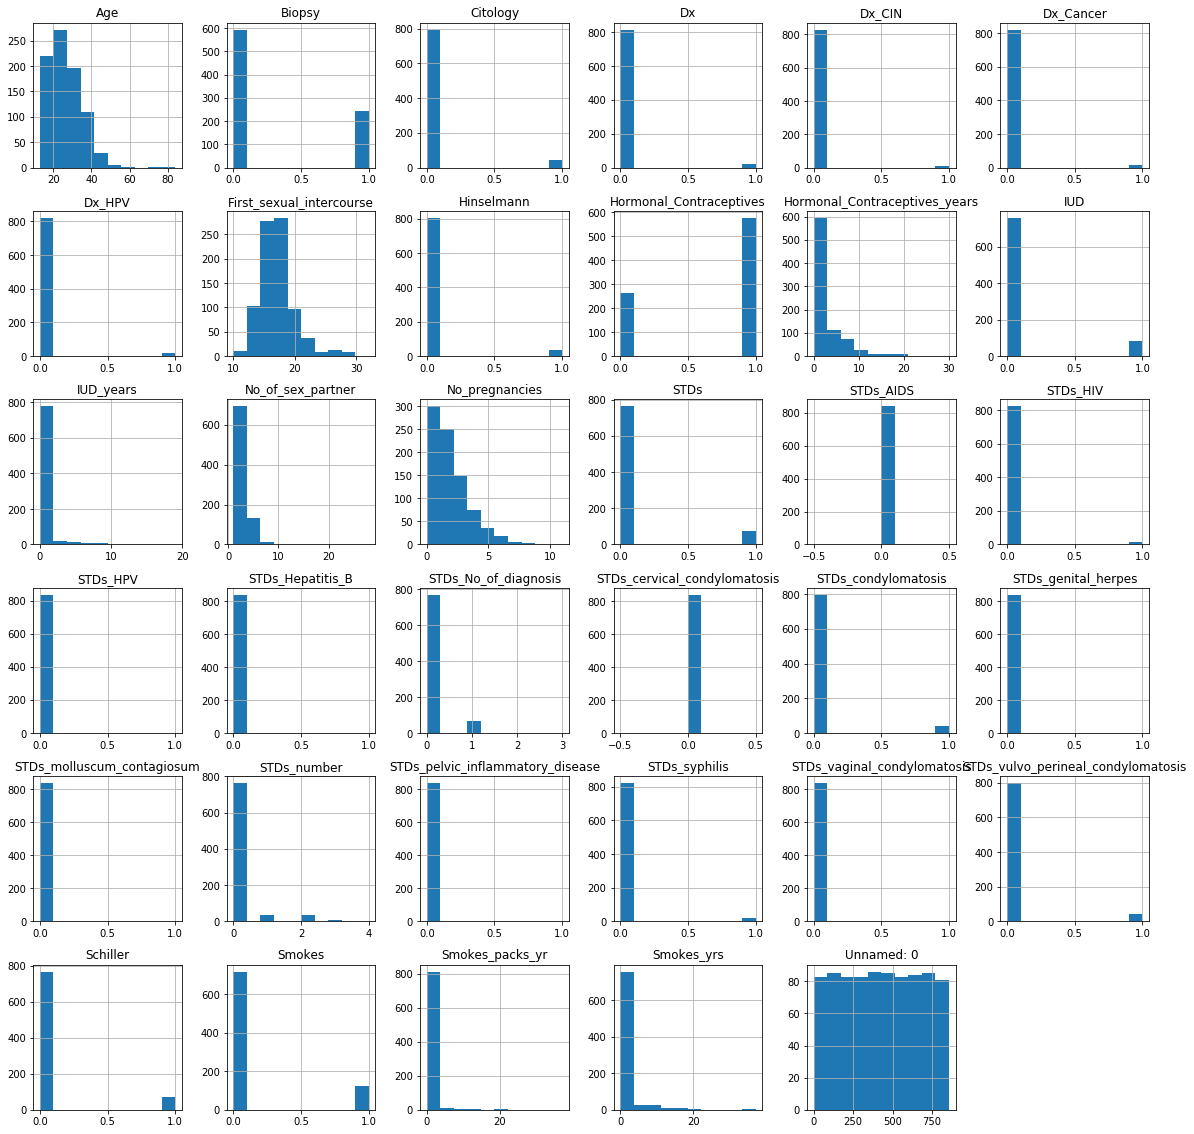

In [46]:
df_impute.hist(figsize=(20,20))
plt.show()

# EDA

In [47]:
print('Proportion of the \'Biopsy\' in the data:')
print(df_impute['Biopsy'].value_counts()/len(df_impute))

Proportion of the 'Biopsy' in the data:
0    0.708831
1    0.291169
Name: Biopsy, dtype: float64


In [48]:
nc = df_impute[(df_impute['Biopsy'] == 0 )].count()[1]
yc = df_impute[(df_impute['Biopsy'] == 1 )].count()[1]
print('Biopsy - Negative : '+ str(nc))
print('Biopsy - Positive : '+ str(yc))

Biopsy - Negative : 594
Biopsy - Positive : 244


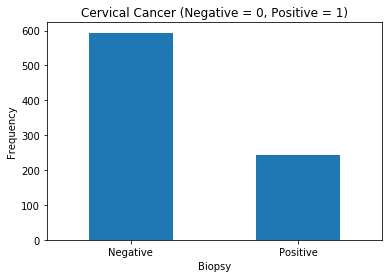

In [49]:
#Check data imbalancing w.r.to target value: 'Biopsy'

count_classes = pd.value_counts(df_impute['Biopsy'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Cervical Cancer (Negative = 0, Positive = 1)")

LABELS = ["Negative", "Positive"]
plt.xticks(range(2), LABELS)
plt.xlabel("Biopsy")
plt.ylabel("Frequency");

# Feature Scaling

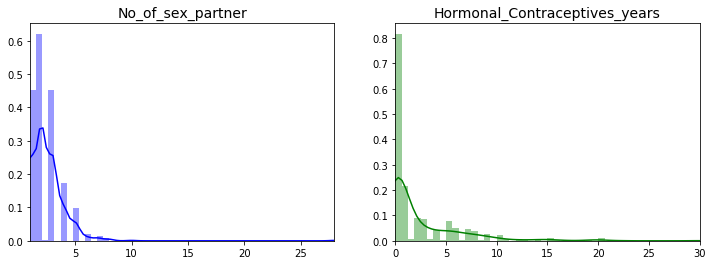

In [50]:
#data distribution before scaling

fig, ax = plt.subplots(1,2,figsize=(12,4))

#preg_val = df_impute['No_pregnancies'].values
sex_val = df_impute['No_of_sex_partner'].values
horm_val = df_impute['Hormonal_Contraceptives_years'].values
#int_val = df_impute['First_sexual_intercourse'].values

#sns.distplot(preg_val, ax=ax[0], color='g')
#ax[0].set_title('No_pregnancies', fontsize=14)
#ax[0].set_xlim([min(preg_val), max(preg_val)])

sns.distplot(sex_val, ax=ax[0], color='b')
ax[0].set_title('No_of_sex_partner', fontsize=14)
ax[0].set_xlim([min(sex_val), max(sex_val)])

sns.distplot(horm_val, ax=ax[1], color='g')
ax[1].set_title('Hormonal_Contraceptives_years', fontsize=14)
ax[1].set_xlim([min(horm_val), max(horm_val)])

#sns.distplot(int_val, ax=ax[3], color='g')
#ax[3].set_title('First_sexual_intercourse', fontsize=14)
#ax[3].set_xlim([min(int_val), max(int_val)])



plt.show()

In [51]:
#scaling function

from sklearn.preprocessing import StandardScaler

df_impute['sex_partner'] = StandardScaler().fit_transform(df_impute['No_of_sex_partner'].values.reshape(-1,1))
df_impute['hormonal_contraceptive_yrs'] = StandardScaler().fit_transform(df_impute['Hormonal_Contraceptives_years'].values.reshape(-1,1))

df_impute.drop(['Hormonal_Contraceptives_years', 'No_of_sex_partner'], axis = 1, inplace = True)

sex = df_impute['sex_partner']
horm = df_impute['hormonal_contraceptive_yrs']

df_impute.drop(['sex_partner', 'hormonal_contraceptive_yrs'], axis=1, inplace=True)
df_impute.insert(0, 'hormonal_contraceptive_yrs', horm)
df_impute.insert(1, 'sex_partner', sex)




In [52]:
df_impute.head(5)

,hormonal_contraceptive_yrs,sex_partner,Unnamed: 0,Age,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,...,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,-0.617434,0.940173,0,18,15,1.0,0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,-0.617434,-0.945424,1,15,14,1.0,0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,0.171192,1.568706,3,52,16,4.0,1,37.0,37.0,1.0,...,0.0,0,1,0,1,0,0,0,0,0
3,3.325699,0.311641,4,46,21,4.0,0,0.0,0.0,1.0,...,0.0,0,0,0,0,0,0,0,0,0
4,-0.617434,0.311641,5,42,23,2.0,0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1


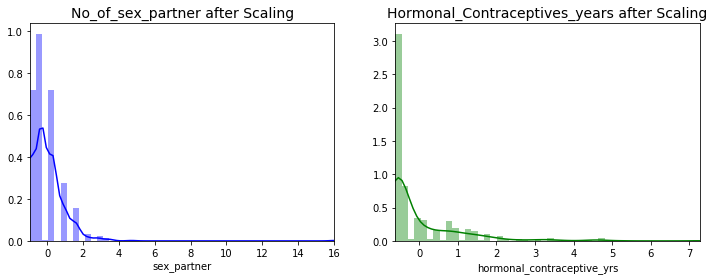

In [53]:
#after scaling

fig, ax = plt.subplots(1,2,figsize=(12,4))

#sns.distplot(preg, ax=ax[0], color='g')
#ax[0].set_title('No_pregnancies', fontsize=14)
#ax[0].set_xlim([min(preg), max(preg)])

sns.distplot(sex, ax=ax[0], color='b')
ax[0].set_title('No_of_sex_partner after Scaling', fontsize=14)
ax[0].set_xlim([min(sex), max(sex)])

sns.distplot(horm, ax=ax[1], color='g')
ax[1].set_title('Hormonal_Contraceptives_years after Scaling', fontsize=14)
ax[1].set_xlim([min(horm), max(horm)])

#sns.distplot(inter, ax=ax[3], color='g')
#ax[3].set_title('First_sexual_intercourse', fontsize=14)
#ax[3].set_xlim([min(inter), max(inter)])

plt.show()

# Equal Distribution

In [689]:
# Since our features are skewed, we should make them equivalent in order to have a normal distribution of the features.

# Lets shuffle the data before creating the subsamples

# df_impute = df_impute.sample(frac=1)

# amount of fraud classes 492 rows.
# positive_df = df_impute.loc[df_impute['Biopsy'] == 1]
# negative_df = df_impute.loc[df_impute['Biopsy'] == 0][:244]

# normal_distributed_df = pd.concat([positive_df, negative_df])

# Shuffle dataframe rows
# new_df = normal_distributed_df.sample(frac=1, random_state=42)


In [690]:
#new_df.head(5)

In [691]:
#print(new_df['Biopsy'].value_counts()/len(new_df)) #Equally Distributed

In [692]:
# count_classes = pd.value_counts(new_df['Biopsy'], sort = True)
# count_classes.plot(kind = 'bar', rot=0)
# plt.title("Cervical Cancer (Negative = 0, Positive = 1)")

# LABELS = ["Negative", "Positive"]
# plt.xticks(range(2), LABELS)
# plt.xlabel("Biopsy")
# plt.ylabel("Frequency");

# Heatmap

In [693]:
# corr = new_df.corr()

# # plot the heatmap
# fig = plt.figure(figsize=(15,15))
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns,
#             linewidths=1.0)

# Train-Test-Split

In [694]:
X = df_impute.drop(['Biopsy'], axis=1)
y = df_impute['Biopsy']

In [695]:
y = y.to_frame()

In [696]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 1 columns):
Biopsy    838 non-null int64
dtypes: int64(1)
memory usage: 6.7 KB


In [697]:
X.shape, y.shape

((838, 34), (838, 1))

In [698]:
#scaler function

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [699]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [700]:
X_train.shape, y_train.shape

((670, 34), (670, 1))

# Dimentionality Reduction

In [701]:
# from sklearn.decomposition import PCA, TruncatedSVD
# from sklearn.manifold import TSNE

# X = new_df.iloc[:,0:32].values
# y = new_df.iloc[:,32].values

# # PCA Implementation

# #X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X)

# # T-SNE Implementation

# X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)


In [702]:
# import matplotlib.patches as mpatches

# f, (ax1) = plt.subplots(1, figsize=(16,6))
# # labels = ['Normal', 'Fraud']
# f.suptitle('Dimensionality Reduction & Clustering', fontsize=14)


# blue_patch = mpatches.Patch(color='#0A0AFF', label='Biopsy Negative')
# red_patch = mpatches.Patch(color='#AF0000', label='Biopsy Positive')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Negative', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Positive', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# # PCA scatter plot
# #x2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Negative', linewidths=2)
# #ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Positive', linewidths=2)
# #ax2.set_title('PCA', fontsize=14)

# #ax2.grid(True)

# #ax2.legend(handles=[blue_patch, red_patch])

# Outlier Detection

In [703]:
X = df_impute.drop(['Unnamed: 0','Biopsy'], axis=1)
y = df_impute['Biopsy']

In [704]:
y = y.to_frame()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 1 columns):
Biopsy    838 non-null int64
dtypes: int64(1)
memory usage: 6.7 KB


In [705]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 33 columns):
hormonal_contraceptive_yrs            838 non-null float64
sex_partner                           838 non-null float64
Age                                   838 non-null int64
First_sexual_intercourse              838 non-null int64
No_pregnancies                        838 non-null float64
Smokes                                838 non-null int64
Smokes_yrs                            838 non-null float64
Smokes_packs_yr                       838 non-null float64
Hormonal_Contraceptives               838 non-null float64
IUD                                   838 non-null float64
IUD_years                             838 non-null float64
STDs                                  838 non-null float64
STDs_number                           838 non-null float64
STDs_condylomatosis                   838 non-null float64
STDs_cervical_condylomatosis          838 non-null float64
STDs_vaginal_con

In [706]:
X.head()

,hormonal_contraceptive_yrs,sex_partner,Age,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,IUD,...,STDs_Hepatitis_B,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology
0,-0.621877,0.939705,18,15,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,-0.621877,-0.949474,15,14,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,0.165559,1.569431,52,16,4.0,1,37.0,37.0,1.0,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
3,3.315302,0.309979,46,21,4.0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4,-0.621877,0.309979,42,23,2.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [707]:
from sklearn import ensemble

our_anomaly_detector = ensemble.IsolationForest(contamination = 0.1, random_state=42)
our_anomaly_detector.fit(X)

training_predictions = our_anomaly_detector.predict(X)
print(len(training_predictions))

838


In [708]:
outlier_label = []
outlier_label = list(training_predictions)

In [709]:
anomaly_iso = outlier_label.count(-1)
print(anomaly_iso)
normal_iso = outlier_label.count(1)
print(normal_iso)

84
754


In [710]:

q = 0

while q < len(outlier_label):
    if outlier_label[q] == -1:
        df_impute.drop(q, axis = 0, inplace = True)
    q+=1

In [711]:
df_impute.to_csv('datasets/df_cervical.csv')

In [712]:
df_cerv = pd.read_csv('datasets/df_cervical.csv')

In [713]:
print(df_cerv['Biopsy'].value_counts())

0    532
1    222
Name: Biopsy, dtype: int64


# Tpot Classifier

In [714]:
X = df_cerv.drop(['Biopsy'], axis=1)
y = df_cerv['Biopsy']

In [715]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [719]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
import sklearn.metrics
import timeit 
import os

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
tpot = TPOTClassifier(generations=10, population_size=100, cv=cv, scoring='balanced_accuracy', verbosity=3, random_state=23, n_jobs=-1, periodic_checkpoint_folder="datasets/tpot_cerv1.txt")

# perform the search 5 times,

# for x in range(5):
#     start_time = timeit.default_timer()
#     tpot.fit(X_train, y_train)
#     elapsed = timeit.default_timer() - start_time
#     times.append(elapsed)
#     winning_pipes.append(tpot.fitted_pipeline_)
#     scores.append(tpot.score(X_test, y_test))
#     tpot.export('tpot_cervical_pipeline.py')
    
# times = [time/60 for time in times]


Version 0.10.2 of tpot is outdated. Version 0.11.5 was released Monday June 01, 2020.


30 operators have been imported by TPOT.


Created new folder to save periodic pipeline: datasets/tpot_cerv1.txt
Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_1_idx_0_2020.10.02_05-31-17.py
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 87.
_pre_test decorator: _random_mutation_operator: num_test=2 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=3 Unsupported set of arguments: The combination of penalty='l1' and lo

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
Generation 3 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5185197851750519	BernoulliNB(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=9, DecisionTreeClassifier__min_samples_leaf=3, DecisionTreeClassifier__min_samples_split=18), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)
-3	0.5198991741399401	BernoulliNB(BernoulliNB(Normalizer(input_matrix, 

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Invalid pipeline encountered. Skipping its evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 4 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5198991741399401	BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_4_idx_1_2020.10.02_05-47-49.py
_pre_test decorator: _random_mutation_operator: num

_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['Unnamed: 0', 'hormonal_contraceptive_yrs', 'sex_partner', 'Unnamed: 0.1', 'Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr', 'Hormonal_Contraceptives', 'IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34']
expected Hormonal_Contraceptives, Unnamed: 0, IUD_y

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 7 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5198991741399401	BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)
-3	0.5382783604397832	BernoulliNB(FastICA(Normalizer(input_matrix, Normalizer__norm=l2), FastICA__tol=0.9), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Periodic pipeline was not saved, probably saved before...

_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['Unnamed: 0', 'hormonal_contraceptive_yrs', 'sex_partner', 'Unnamed: 0.1', 'Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr', 'Hormonal_Contraceptives', 'IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34']
expected Hormonal_Contraceptives, Unnamed: 0, IUD_y

NameError: name 'times' is not defined

In [720]:
times = []
scores = []
winning_pipes = []

# perform the search 5 times,

for x in range(5):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_cervical_pipeline.py')
    
times = [time/60 for time in times]


Version 0.10.2 of tpot is outdated. Version 0.11.5 was released Monday June 01, 2020.


30 operators have been imported by TPOT.


Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_1_idx_0_2020.10.02_14-08-10.py
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 87.
_pre_test decorator: _random_mutation_operator: num_test=2 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=3 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penal

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
Generation 3 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5185197851750519	BernoulliNB(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=9, DecisionTreeClassifier__min_samples_leaf=3, DecisionTreeClassifier__min_samples_split=18), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)
-3	0.5198991741399401	BernoulliNB(BernoulliNB(Normalizer(input_matrix, 

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Invalid pipeline encountered. Skipping its evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 4 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5198991741399401	BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_4_idx_1_2020.10.02_14-32-22.py
_pre_test decorator: _random_mutation_operator: num

_pre_test decorator: _random_mutation_operator: num_test=1 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['Unnamed: 0', 'hormonal_contraceptive_yrs', 'sex_partner', 'Unnamed: 0.1', 'Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr', 'Hormonal_Contraceptives', 'IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 7 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5198991741399401	BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)
-3	0.5382783604397832	BernoulliNB(FastICA(Normalizer(input_matrix, Normalizer__norm=l2), FastICA__tol=0.9), BernoulliNB__alpha=10.0, Bernou

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 9 - Current Pareto front scores:
-1	0.5230721487561433	GradientBoostingClassifier(CombineDFs(input_matrix, input_matrix), GradientBoostingClassifier__learning_rate=1.0, GradientBoostingClassifier__max_depth=6, GradientBoostingClassifier__max_features=0.25, GradientBoostingClassifier__min_samples_leaf=16, GradientBoostingClassifier__min_samples_split=13, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.15000000000000002)
-2	0.5339109287125704	BernoulliNB(MinMaxScaler(input_matrix), Berno

Version 0.10.2 of tpot is outdated. Version 0.11.5 was released Monday June 01, 2020.


30 operators have been imported by TPOT.


Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_1_idx_0_2020.10.02_15-30-06.py
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 87.
_pre_test decorator: _random_mutation_operator: num_test=2 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=3 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penal

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
Generation 3 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5185197851750519	BernoulliNB(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=9, DecisionTreeClassifier__min_samples_leaf=3, DecisionTreeClassifier__min_samples_split=18), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)
-3	0.5198991741399401	BernoulliNB(BernoulliNB(Normalizer(input_matrix, 

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Invalid pipeline encountered. Skipping its evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 4 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5198991741399401	BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_4_idx_1_2020.10.02_15-51-48.py
_pre_test decorator: _random_mutation_operator: num

_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['Unnamed: 0', 'hormonal_contraceptive_yrs', 'sex_partner', 'Unnamed: 0.1', 'Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr', 'Hormonal_Contraceptives', 'IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34']
expected Hormonal_Contraceptives, Unnamed: 0, IUD_y

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 7 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5198991741399401	BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)
-3	0.5382783604397832	BernoulliNB(FastICA(Normalizer(input_matrix, Normalizer__norm=l2), FastICA__tol=0.9), BernoulliNB__alpha=10.0, Bernou

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).
Generation 9 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(

Generation 10 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5339109287125704	BernoulliNB(MinMaxScaler(input_matrix), BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-3	0.5382783604397832	BernoulliNB(FastICA(Normalizer(input_matrix, Normalizer__norm=l2), FastICA__tol=0.9), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Periodic pipeline was not saved, probably saved before...
Periodic pipeline was not saved, probably saved before...


Version 0.10.2 of tpot is outdated. Version 0.11.5 was released Monday June 01, 2020.


30 operators have been imported by TPOT.


Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_1_idx_0_2020.10.02_17-04-12.py
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 87.
_pre_test decorator: _random_mutation_operator: num_test=2 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=3 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penal

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
Generation 3 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5185197851750519	BernoulliNB(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=9, DecisionTreeClassifier__min_samples_leaf=3, DecisionTreeClassifier__min_samples_split=18), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)
-3	0.5198991741399401	BernoulliNB(BernoulliNB(Normalizer(input_matrix, 

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Invalid pipeline encountered. Skipping its evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 4 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5198991741399401	BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_4_idx_1_2020.10.02_17-26-45.py
_pre_test decorator: _random_mutation_operator: num

_pre_test decorator: _random_mutation_operator: num_test=1 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['Unnamed: 0', 'hormonal_contraceptive_yrs', 'sex_partner', 'Unnamed: 0.1', 'Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr', 'Hormonal_Contraceptives', 'IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 7 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5198991741399401	BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)
-3	0.5382783604397832	BernoulliNB(FastICA(Normalizer(input_matrix, Normalizer__norm=l2), FastICA__tol=0.9), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Periodic pipeline was not saved, probably saved before...

_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['Unnamed: 0', 'hormonal_contraceptive_yrs', 'sex_partner', 'Unnamed: 0.1', 'Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr', 'Hormonal_Contraceptives', 'IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34']
expected Hormonal_Contraceptives, Unnamed: 0, IUD_y

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 10 - Current Pareto front scores:
-1	0.5185717180929219	BernoulliNB(CombineDFs(input_matrix, CombineDFs(input_matrix, CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)))), BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=True)
-2	0.5298398946141764	BernoulliNB(FastICA(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), FastICA__tol=0.65), BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-3	0.5396729492830724	BernoulliNB(FastICA(Normalizer(input_matrix, Normalizer__norm=l2), FastICA__tol=0.9), BernoulliNB__alpha=0.1, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Periodic pipeline was not saved, probably saved before...
Saving periodi

Version 0.10.2 of tpot is outdated. Version 0.11.5 was released Monday June 01, 2020.


30 operators have been imported by TPOT.


Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_1_idx_0_2020.10.02_18-19-52.py
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 87.
_pre_test decorator: _random_mutation_operator: num_test=2 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=3 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penal

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
Generation 3 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5185197851750519	BernoulliNB(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=9, DecisionTreeClassifier__min_samples_leaf=3, DecisionTreeClassifier__min_samples_split=18), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)
-3	0.5198991741399401	BernoulliNB(BernoulliNB(Normalizer(input_matrix, 

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Invalid pipeline encountered. Skipping its evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 4 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5198991741399401	BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_4_idx_1_2020.10.02_18-39-23.py
_pre_test decorator: _random_mutation_operator: num

_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['Unnamed: 0', 'hormonal_contraceptive_yrs', 'sex_partner', 'Unnamed: 0.1', 'Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr', 'Hormonal_Contraceptives', 'IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34']
expected Hormonal_Contraceptives, Unnamed: 0, IUD_y

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 7 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5198991741399401	BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)
-3	0.5382783604397832	BernoulliNB(FastICA(Normalizer(input_matrix, Normalizer__norm=l2), FastICA__tol=0.9), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Periodic pipeline was not saved, probably saved before...

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 9 - Current Pareto front scores:
-1	0.5230721487561433	GradientBoostingClassifier(CombineDFs(input_matrix, input_matrix), GradientBoostingClassifier__learning_rate=1.0, GradientBoostingClassifier__max_depth=6, GradientBoostingClassifier__max_features=0.25, GradientBoostingClassifier__min_samples_leaf=16, GradientBoostingClassifier__min_samples_split=13, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.15000000000000002)
-2	0.5339109287125704	BernoulliNB(MinMaxScaler(input_matrix), BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-3	0.5382783604397832	BernoulliNB(FastICA(Normalizer(input_matrix, Normalizer__norm=l2), FastICA__tol=0.9), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Saving periodic pipeline from pareto front to datasets/

Version 0.10.2 of tpot is outdated. Version 0.11.5 was released Monday June 01, 2020.


30 operators have been imported by TPOT.


Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_1_idx_0_2020.10.02_19-33-27.py
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 87.
_pre_test decorator: _random_mutation_operator: num_test=2 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=3 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penal

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
Generation 3 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5185197851750519	BernoulliNB(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=9, DecisionTreeClassifier__min_samples_leaf=3, DecisionTreeClassifier__min_samples_split=18), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)
-3	0.5198991741399401	BernoulliNB(BernoulliNB(Normalizer(input_matrix, 

Invalid pipeline encountered. Skipping its evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 4 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5198991741399401	BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_4_idx_1_2020.10.02_19-53-18.py
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solv

_pre_test decorator: _random_mutation_operator: num_test=1 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['Unnamed: 0', 'hormonal_contraceptive_yrs', 'sex_partner', 'Unnamed: 0.1', 'Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr', 'Hormonal_Contraceptives', 'IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 7 - Current Pareto front scores:
-1	0.5122536353042509	BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-2	0.5198991741399401	BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)
-3	0.5382783604397832	BernoulliNB(FastICA(Normalizer(input_matrix, Normalizer__norm=l2), FastICA__tol=0.9), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Periodic pipeline was not saved, probably saved before...

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 9 - Current Pareto front scores:
-1	0.5230721487561433	GradientBoostingClassifier(CombineDFs(input_matrix, input_matrix), GradientBoostingClassifier__learning_rate=1.0, GradientBoostingClassifier__max_depth=6, GradientBoostingClassifier__max_features=0.25, GradientBoostingClassifier__min_samples_leaf=16, GradientBoostingClassifier__min_samples_split=13, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.15000000000000002)
-2	0.5339109287125704	BernoulliNB(MinMaxScaler(input_matrix), BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)
-3	0.5382783604397832	BernoulliNB(FastICA(Normalizer(input_matrix, Normalizer__norm=l2), FastICA__tol=0.9), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)

Periodic pipeline was not saved, probably saved before...
Saving periodic pipeline from pareto front to datasets/

In [721]:
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

Times: [81.278947115, 94.02291446333341, 75.84170283999993, 73.34172908500004, 131.52202059333322]
Scores: [0.485094037615046, 0.5414165666266506, 0.5096038415366146, 0.485094037615046, 0.485094037615046]
Winning pipelines: [Pipeline(steps=[('normalizer', Normalizer()), ('fastica', FastICA(tol=0.9)),
                ('bernoullinb', BernoulliNB(alpha=10.0, fit_prior=False))]), Pipeline(steps=[('normalizer', Normalizer()), ('fastica', FastICA(tol=0.9)),
                ('bernoullinb', BernoulliNB(alpha=10.0, fit_prior=False))]), Pipeline(steps=[('normalizer', Normalizer()), ('fastica', FastICA(tol=0.9)),
                ('bernoullinb', BernoulliNB(alpha=0.1, fit_prior=False))]), Pipeline(steps=[('normalizer', Normalizer()), ('fastica', FastICA(tol=0.9)),
                ('bernoullinb', BernoulliNB(alpha=10.0, fit_prior=False))]), Pipeline(steps=[('normalizer', Normalizer()), ('fastica', FastICA(tol=0.9)),
                ('bernoullinb', BernoulliNB(alpha=10.0, fit_prior=False))])]


In [722]:

model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(X, y)
# export the best model
model.export('tpot_cervical_model.py')

Version 0.10.2 of tpot is outdated. Version 0.11.5 was released Monday June 01, 2020.


Generation 1 - Current best internal CV score: 0.70646783625731
Generation 2 - Current best internal CV score: 0.7078128654970759
Generation 3 - Current best internal CV score: 0.7078128654970759
Generation 4 - Current best internal CV score: 0.7078128654970759
Generation 5 - Current best internal CV score: 0.7078128654970759

Best pipeline: KNeighborsClassifier(FeatureAgglomeration(SelectPercentile(input_matrix, percentile=76), affinity=l2, linkage=complete), n_neighbors=58, p=1, weights=distance)


In [723]:
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(X_train, y_train)
# export the best model
model.export('tpot_cervical_model.py')

Version 0.10.2 of tpot is outdated. Version 0.11.5 was released Monday June 01, 2020.


Generation 1 - Current best internal CV score: 0.7137067395264116
Generation 2 - Current best internal CV score: 0.7137067395264116
Generation 3 - Current best internal CV score: 0.7137067395264116
Generation 4 - Current best internal CV score: 0.7137067395264116
Generation 5 - Current best internal CV score: 0.7137067395264116

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=100, p=1, weights=distance)


In [724]:
X = df_impute.drop(['Unnamed: 0','Biopsy'], axis=1)
y = df_impute['Biopsy']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [725]:
tpot = TPOTClassifier(generations=10, population_size=100, cv=cv, scoring='balanced_accuracy', verbosity=3, random_state=23, n_jobs=-1, periodic_checkpoint_folder="datasets/tpot_cerv1.txt")

times = []
scores = []
winning_pipes = []

# perform the search 1 times,

for x in range(1):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_cervical_pipeline.py')
    
times = [time/60 for time in times]

Version 0.10.2 of tpot is outdated. Version 0.11.5 was released Monday June 01, 2020.


30 operators have been imported by TPOT.


Saving periodic pipeline from pareto front to datasets/tpot_cerv1.txt\pipeline_gen_1_idx_0_2020.10.02_23-39-07.py
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 X contains negative values..
_pre_test decorator: _random_mutation_operator: num_test=1 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 96.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['hormonal_contraceptive_yrs', 'sex_partner', 'Age', 'First_sexual_intercourse', 'No_pregnancie

Generation 2 - Current Pareto front scores:
-1	0.5132504939960482	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=1.0, GradientBoostingClassifier__max_depth=8, GradientBoostingClassifier__max_features=0.5, GradientBoostingClassifier__min_samples_leaf=1, GradientBoostingClassifier__min_samples_split=7, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.55)
-3	0.5195698434412525	GradientBoostingClassifier(StandardScaler(FeatureAgglomeration(input_matrix, FeatureAgglomeration__affinity=l1, FeatureAgglomeration__linkage=average)), GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=5, GradientBoostingClassifier__max_features=0.55, GradientBoostingClassifier__min_samples_leaf=5, GradientBoostingClassifier__min_samples_split=16, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.8500000000000001)
-4	0.521995490702741	GradientBoostingClassifier(StandardScal

_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['hormonal_contraceptive_yrs', 'sex_partner', 'Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr', 'Hormonal_Contraceptives', 'IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32']
expected Hormonal_Contraceptives, IUD_years, STDs_genital_herpes, Smokes_yrs, STDs_HIV, STDs_ce

_pre_test decorator: _random_mutation_operator: num_test=0 X contains negative values..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 X contains negative values..
_pre_test decorator: _random_mutation_operator: num_test=0 X contains negative values..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Found ar

Generation 6 - Current Pareto front scores:
-1	0.5255687287835031	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=7, GradientBoostingClassifier__max_features=0.5, GradientBoostingClassifier__min_samples_leaf=1, GradientBoostingClassifier__min_samples_split=17, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.1)
-4	0.5365151745452703	GradientBoostingClassifier(FeatureAgglomeration(GaussianNB(RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.9000000000000001, RandomForestClassifier__min_samples_leaf=5, RandomForestClassifier__min_samples_split=18, RandomForestClassifier__n_estimators=100)), FeatureAgglomeration__affinity=l1, FeatureAgglomeration__linkage=average), GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=5, GradientBoostingC

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 63.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['hormonal_contraceptive_yrs', 'sex_partner', 'Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr', 'Hormonal_Contraceptives', 'IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 2 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['hormonal_contraceptive_yrs', 'sex_partner', 'Age', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr', 'Hormonal_Contraceptives', 'IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26

_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_operator: num_test=0 X contains negative values..
_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 100.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 10 - Current Pareto front scores:
-1	0.5255687287835031	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=7, GradientBoostingClassifier__max_features=0.5, GradientBoostingClassifier__min_samples_leaf=1, Gradient

In [726]:
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

Times: [959.2854502583333]
Scores: [0.5064025610244097]
Winning pipelines: [Pipeline(steps=[('pca', PCA(iterated_power=2, svd_solver='randomized')),
                ('fastica', FastICA(tol=0.9)),
                ('bernoullinb', BernoulliNB(alpha=10.0, fit_prior=False))])]


In [727]:
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(X, y)
# export the best model
model.export('tpot_cervical.py')

Version 0.10.2 of tpot is outdated. Version 0.11.5 was released Monday June 01, 2020.


Generation 1 - Current best internal CV score: 0.7055789473684212
Generation 2 - Current best internal CV score: 0.7055789473684212
Generation 3 - Current best internal CV score: 0.7055789473684212
Generation 4 - Current best internal CV score: 0.7055789473684212
Generation 5 - Current best internal CV score: 0.7055789473684212

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.01, max_depth=6, min_child_weight=14, n_estimators=100, nthread=1, subsample=0.45)


# Tensorflow

In [ ]:
import tensorflow as tf
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=200,activation='relu',input_shape= (33,)))
model.add(tf.keras.layers.Dense(units=200,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               6800      
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 47,201
Trainable params: 47,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
epochs_hist = model.fit(X_train,y_train,epochs=50,batch_size=20)

Epoch 1/50
34/34 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.9149
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9657
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9687
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9776
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9791
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9806
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9851
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9836
Epoch 9/50
34/34 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9896
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9851
Epoch 11/50
34/34 [

In [ ]:
y_pred=model.predict(X_test)


In [ ]:
y_pred = (y_pred>0.5)

Text(0.5, 1.0, 'Loss and Accuracy plot')

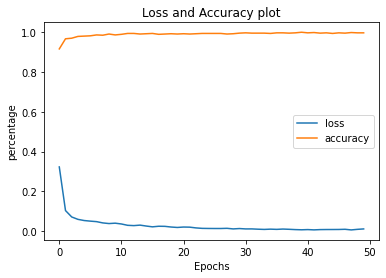

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('percentage')
plt.legend(['loss','accuracy'])
plt.title('Loss and Accuracy plot')

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.9048


[0.6012685298919678, 0.9047619104385376]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

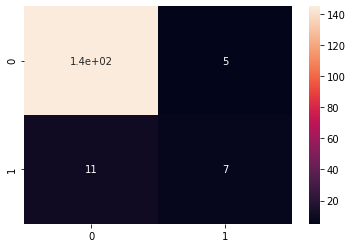

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       150
           1       0.58      0.39      0.47        18

    accuracy                           0.90       168
   macro avg       0.76      0.68      0.71       168
weighted avg       0.89      0.90      0.90       168

